# 09 - Application Classes for Optimization Problems

In [1]:
# This code is from the tutorial at:
# https://qiskit-community.github.io/qiskit-optimization/tutorials/09_application_classes.html

In [2]:
from qiskit_optimization.algorithms import MinimumEigenOptimizer
from qiskit_algorithms.utils import algorithm_globals
from qiskit_algorithms import QAOA, NumPyMinimumEigensolver
from qiskit_algorithms.optimizers import COBYLA


# Switch to Quantum Rings's Sampler
#from qiskit.primitives import Sampler
from quantumrings.toolkit.qiskit import QrSamplerV1 as Sampler

# Vertex cover problem

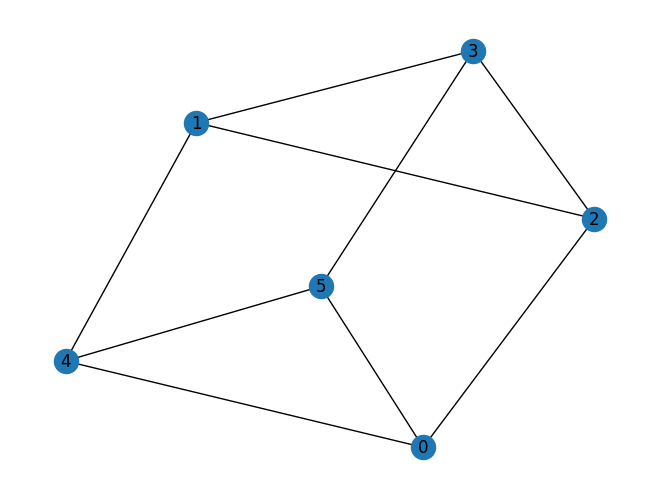

In [3]:
from qiskit_optimization.applications.vertex_cover import VertexCover
import networkx as nx

seed = 123
algorithm_globals.random_seed = seed
graph = nx.random_regular_graph(d=3, n=6, seed=seed)
pos = nx.spring_layout(graph, seed=seed)
prob = VertexCover(graph)
prob.draw(pos=pos)


In [4]:
qp = prob.to_quadratic_program()
print(qp.prettyprint())

Problem name: Vertex cover

Minimize
  x_0 + x_1 + x_2 + x_3 + x_4 + x_5

Subject to
  Linear constraints (9)
    x_0 + x_4 >= 1  'c0'
    x_0 + x_2 >= 1  'c1'
    x_0 + x_5 >= 1  'c2'
    x_1 + x_2 >= 1  'c3'
    x_1 + x_4 >= 1  'c4'
    x_1 + x_3 >= 1  'c5'
    x_2 + x_3 >= 1  'c6'
    x_3 + x_5 >= 1  'c7'
    x_4 + x_5 >= 1  'c8'

  Binary variables (6)
    x_0 x_1 x_2 x_3 x_4 x_5



objective function value: 4.0
variable values: x_0=0.0, x_1=0.0, x_2=1.0, x_3=1.0, x_4=1.0, x_5=1.0
status: SUCCESS

solution: [2, 3, 4, 5]


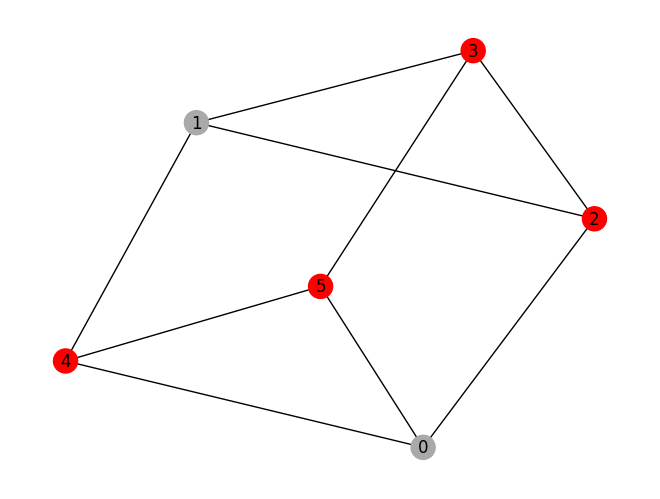

In [5]:
# Numpy Eigensolver
meo = MinimumEigenOptimizer(min_eigen_solver=NumPyMinimumEigensolver())
result = meo.solve(qp)
print(result.prettyprint())
print("\nsolution:", prob.interpret(result))
prob.draw(result, pos=pos)

objective function value: 4.0
variable values: x_0=1.0, x_1=1.0, x_2=0.0, x_3=1.0, x_4=1.0, x_5=0.0
status: SUCCESS

solution: [0, 1, 3, 4]

time: 1.6609249114990234


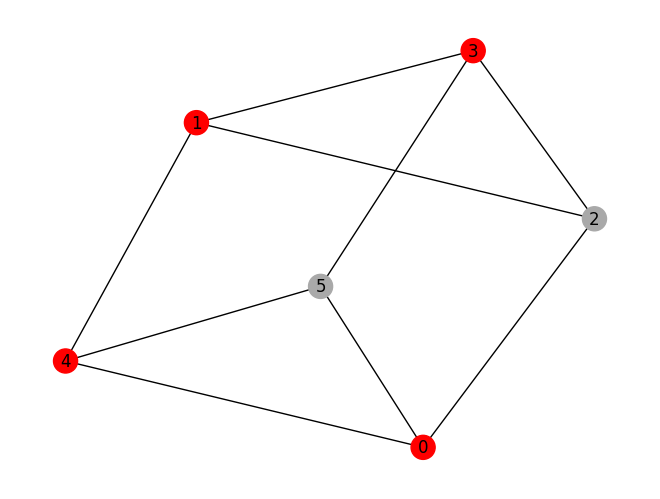

In [6]:
# QAOA
meo = MinimumEigenOptimizer(min_eigen_solver=QAOA(reps=1, sampler=Sampler(), optimizer=COBYLA()))
result = meo.solve(qp)
print(result.prettyprint())
print("\nsolution:", prob.interpret(result))
print("\ntime:", result.min_eigen_solver_result.optimizer_time)
prob.draw(result, pos=pos)

# Knapsack problem

In [7]:
from qiskit_optimization.applications import Knapsack

prob = Knapsack(values=[3, 4, 5, 6, 7], weights=[2, 3, 4, 5, 6], max_weight=10)
qp = prob.to_quadratic_program()
print(qp.prettyprint())

Problem name: Knapsack

Maximize
  3*x_0 + 4*x_1 + 5*x_2 + 6*x_3 + 7*x_4

Subject to
  Linear constraints (1)
    2*x_0 + 3*x_1 + 4*x_2 + 5*x_3 + 6*x_4 <= 10  'c0'

  Binary variables (5)
    x_0 x_1 x_2 x_3 x_4



In [8]:
# Numpy Eigensolver
meo = MinimumEigenOptimizer(min_eigen_solver=NumPyMinimumEigensolver())
result = meo.solve(qp)
print(result.prettyprint())
print("\nsolution:", prob.interpret(result))

objective function value: 13.0
variable values: x_0=1.0, x_1=1.0, x_2=0.0, x_3=1.0, x_4=0.0
status: SUCCESS

solution: [0, 1, 3]


In [9]:
# QAOA
meo = MinimumEigenOptimizer(min_eigen_solver=QAOA(reps=1, sampler=Sampler(), optimizer=COBYLA()))
result = meo.solve(qp)
print(result.prettyprint())
print("\nsolution:", prob.interpret(result))
print("\ntime:", result.min_eigen_solver_result.optimizer_time)

objective function value: 13.0
variable values: x_0=1.0, x_1=1.0, x_2=0.0, x_3=1.0, x_4=0.0
status: SUCCESS

solution: [0, 1, 3]

time: 2.2351861000061035


# How to check the Hamiltonian

In [10]:
from qiskit_optimization.converters import QuadraticProgramToQubo

# the same knapsack problem instance as in the previous section
prob = Knapsack(values=[3, 4, 5, 6, 7], weights=[2, 3, 4, 5, 6], max_weight=10)
qp = prob.to_quadratic_program()
print(qp.prettyprint())

Problem name: Knapsack

Maximize
  3*x_0 + 4*x_1 + 5*x_2 + 6*x_3 + 7*x_4

Subject to
  Linear constraints (1)
    2*x_0 + 3*x_1 + 4*x_2 + 5*x_3 + 6*x_4 <= 10  'c0'

  Binary variables (5)
    x_0 x_1 x_2 x_3 x_4



In [11]:
# intermediate QUBO form of the optimization problem
conv = QuadraticProgramToQubo()
qubo = conv.convert(qp)
print(qubo.prettyprint())

Problem name: Knapsack

Minimize
  26*c0@int_slack@0^2 + 104*c0@int_slack@0*c0@int_slack@1
  + 208*c0@int_slack@0*c0@int_slack@2 + 156*c0@int_slack@0*c0@int_slack@3
  + 104*c0@int_slack@1^2 + 416*c0@int_slack@1*c0@int_slack@2
  + 312*c0@int_slack@1*c0@int_slack@3 + 416*c0@int_slack@2^2
  + 624*c0@int_slack@2*c0@int_slack@3 + 234*c0@int_slack@3^2
  + 104*x_0*c0@int_slack@0 + 208*x_0*c0@int_slack@1 + 416*x_0*c0@int_slack@2
  + 312*x_0*c0@int_slack@3 + 104*x_0^2 + 312*x_0*x_1 + 416*x_0*x_2 + 520*x_0*x_3
  + 624*x_0*x_4 + 156*x_1*c0@int_slack@0 + 312*x_1*c0@int_slack@1
  + 624*x_1*c0@int_slack@2 + 468*x_1*c0@int_slack@3 + 234*x_1^2 + 624*x_1*x_2
  + 780*x_1*x_3 + 936*x_1*x_4 + 208*x_2*c0@int_slack@0 + 416*x_2*c0@int_slack@1
  + 832*x_2*c0@int_slack@2 + 624*x_2*c0@int_slack@3 + 416*x_2^2 + 1040*x_2*x_3
  + 1248*x_2*x_4 + 260*x_3*c0@int_slack@0 + 520*x_3*c0@int_slack@1
  + 1040*x_3*c0@int_slack@2 + 780*x_3*c0@int_slack@3 + 650*x_3^2 + 1560*x_3*x_4
  + 312*x_4*c0@int_slack@0 + 624*x_4*c0@int_

In [12]:
# qubit Hamiltonian and offset
op, offset = qubo.to_ising()
print(f"num qubits: {op.num_qubits}, offset: {offset}\n")
print(op)

num qubits: 9, offset: 1417.5

SparsePauliOp(['IIIIIIIIZ', 'IIIIIIIZI', 'IIIIIIZII', 'IIIIIZIII', 'IIIIZIIII', 'IIIZIIIII', 'IIZIIIIII', 'IZIIIIIII', 'ZIIIIIIII', 'IIIIIIIZZ', 'IIIIIIZIZ', 'IIIIIZIIZ', 'IIIIZIIIZ', 'IIIZIIIIZ', 'IIZIIIIIZ', 'IZIIIIIIZ', 'ZIIIIIIIZ', 'IIIIIIZZI', 'IIIIIZIZI', 'IIIIZIIZI', 'IIIZIIIZI', 'IIZIIIIZI', 'IZIIIIIZI', 'ZIIIIIIZI', 'IIIIIZZII', 'IIIIZIZII', 'IIIZIIZII', 'IIZIIIZII', 'IZIIIIZII', 'ZIIIIIZII', 'IIIIZZIII', 'IIIZIZIII', 'IIZIIZIII', 'IZIIIZIII', 'ZIIIIZIII', 'IIIZZIIII', 'IIZIZIIII', 'IZIIZIIII', 'ZIIIZIIII', 'IIZZIIIII', 'IZIZIIIII', 'ZIIZIIIII', 'IZZIIIIII', 'ZIZIIIIII', 'ZZIIIIIII'],
              coeffs=[-258.5+0.j, -388. +0.j, -517.5+0.j, -647. +0.j, -776.5+0.j, -130. +0.j,
 -260. +0.j, -520. +0.j, -390. +0.j,   78. +0.j,  104. +0.j,  130. +0.j,
  156. +0.j,   26. +0.j,   52. +0.j,  104. +0.j,   78. +0.j,  156. +0.j,
  195. +0.j,  234. +0.j,   39. +0.j,   78. +0.j,  156. +0.j,  117. +0.j,
  260. +0.j,  312. +0.j,   52. +0.j,  104. +0.j,  208. 